### Import required libraries

In [28]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import numpy as np
nlp = spacy.load("en_core_web_sm")
import seaborn as sns
import re

#### Reading the file

In [2]:
with open("Transcript.txt","r",encoding="utf-8") as f:
    text = f.read()

In [3]:
doc = nlp(str(text)) ##Creating a spacy doc object

In [4]:
# print(doc)

In [5]:
# Function to plot the wordcloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

In [6]:
#!pip install wordcloud
from wordcloud import WordCloud , STOPWORDS

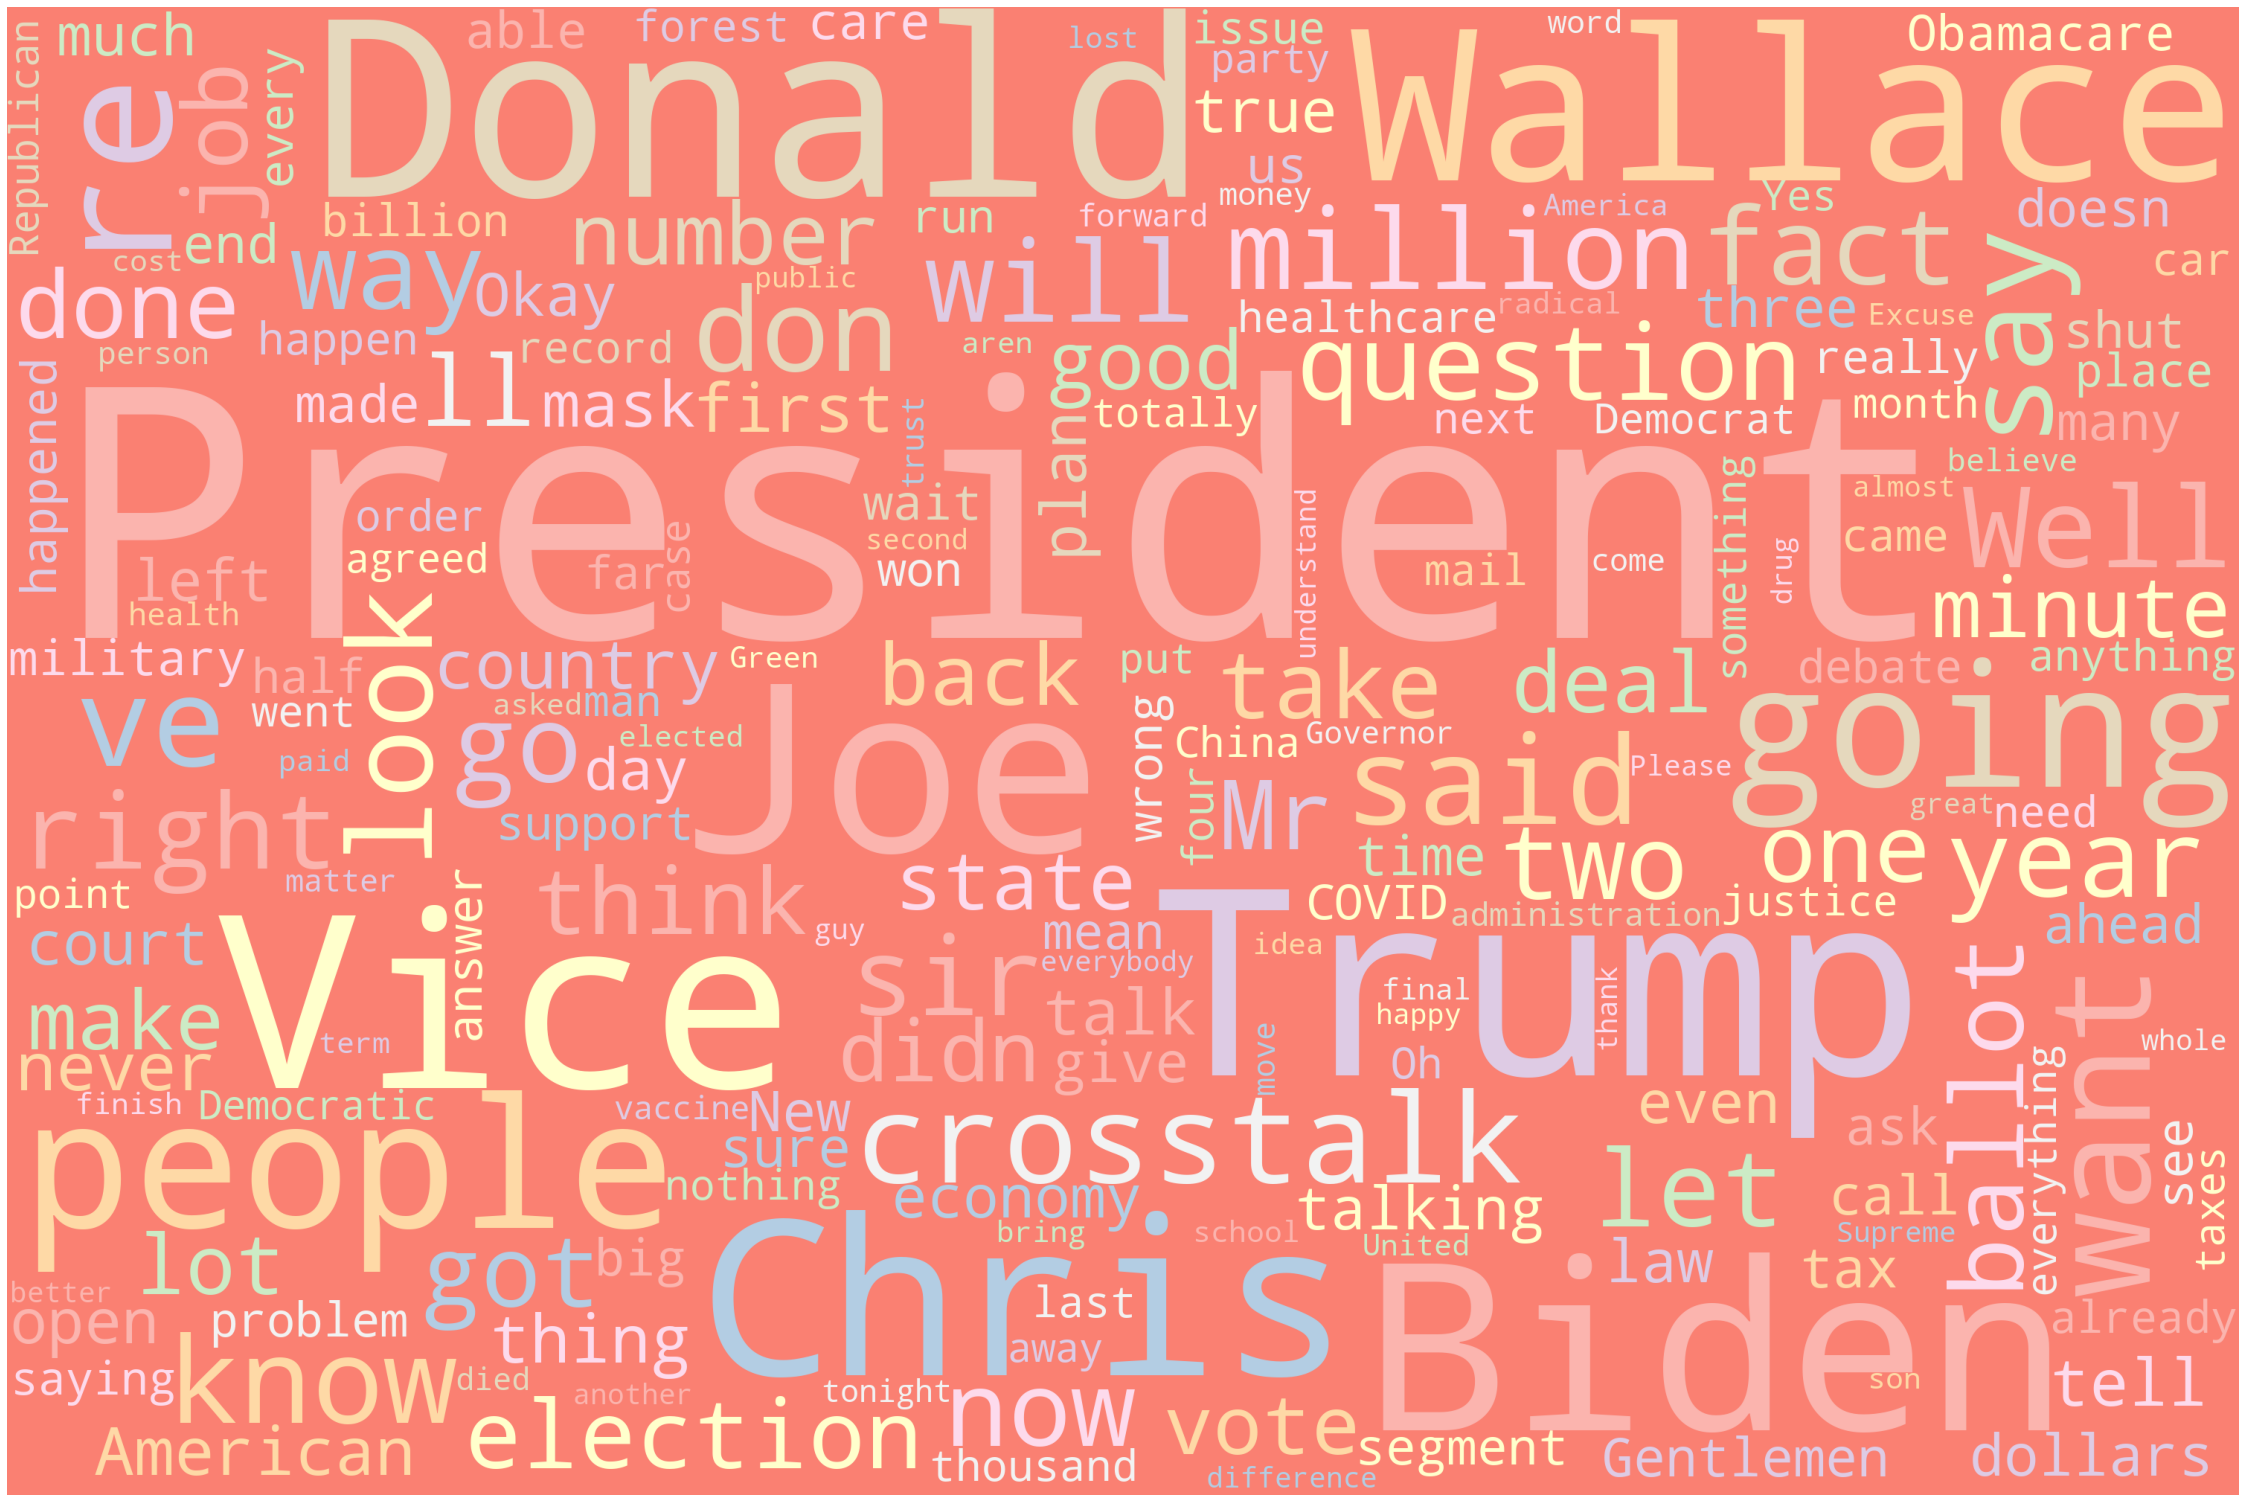

In [7]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color="salmon" , colormap="Pastel1" , collocations=False, stopwords=STOPWORDS).generate(str(text))
plot_cloud(wordcloud)

In [8]:
with open("Transcript.txt","r",encoding="utf-8") as f:
    text_lines = f.readlines() 

In [9]:
sentences = []
for line in text_lines:
    sentences.append(line)

### Creating a dataframe containing the sentences

In [10]:
df = pd.DataFrame(sentences,columns=["sentence"])
df.head()

sentence
0                           Chris Wallace: (01:20)\n
1  Good evening from the Health Education Campus ...
2                                                 \n
3                           Chris Wallace: (02:10)\n
4  This debate is being conducted under health an...

### Extracting Polarity Scores using Vader Sentiment Analyzer

In [11]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [13]:
df['scores'] = df['sentence'].apply(lambda sent: sid.polarity_scores(sent))
df.head()

# It returns a dictionary with scores

sentence  \
0                           Chris Wallace: (01:20)\n   
1  Good evening from the Health Education Campus ...   
2                                                 \n   
3                           Chris Wallace: (02:10)\n   
4  This debate is being conducted under health an...   

                                              scores  
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
1  {'neg': 0.0, 'neu': 0.901, 'pos': 0.099, 'comp...  
2  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...  
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
4  {'neg': 0.079, 'neu': 0.752, 'pos': 0.169, 'co...

In [14]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

sentence  \
0                           Chris Wallace: (01:20)\n   
1  Good evening from the Health Education Campus ...   
2                                                 \n   
3                           Chris Wallace: (02:10)\n   
4  This debate is being conducted under health an...   

                                              scores  compound  
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
1  {'neg': 0.0, 'neu': 0.901, 'pos': 0.099, 'comp...    0.8957  
2  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...    0.0000  
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
4  {'neg': 0.079, 'neu': 0.752, 'pos': 0.169, 'co...    0.8661

In [15]:
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df.head()

sentence  \
0                           Chris Wallace: (01:20)\n   
1  Good evening from the Health Education Campus ...   
2                                                 \n   
3                           Chris Wallace: (02:10)\n   
4  This debate is being conducted under health an...   

                                              scores  compound comp_score  
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000        pos  
1  {'neg': 0.0, 'neu': 0.901, 'pos': 0.099, 'comp...    0.8957        pos  
2  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...    0.0000        pos  
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000        pos  
4  {'neg': 0.079, 'neu': 0.752, 'pos': 0.169, 'co...    0.8661        pos

### Positive v/s Negative lines

<AxesSubplot:xlabel='comp_score', ylabel='count'>

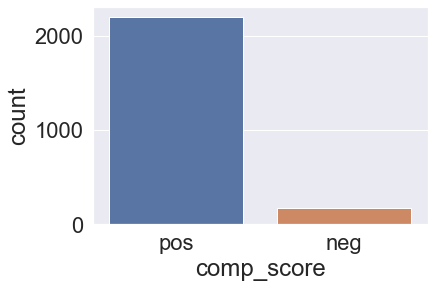

In [16]:
sns.set(font_scale=2)
sns.countplot(df["comp_score"])

In [17]:
negative_sent = df[df.comp_score=="neg"] #Separate dataframe with negative senences

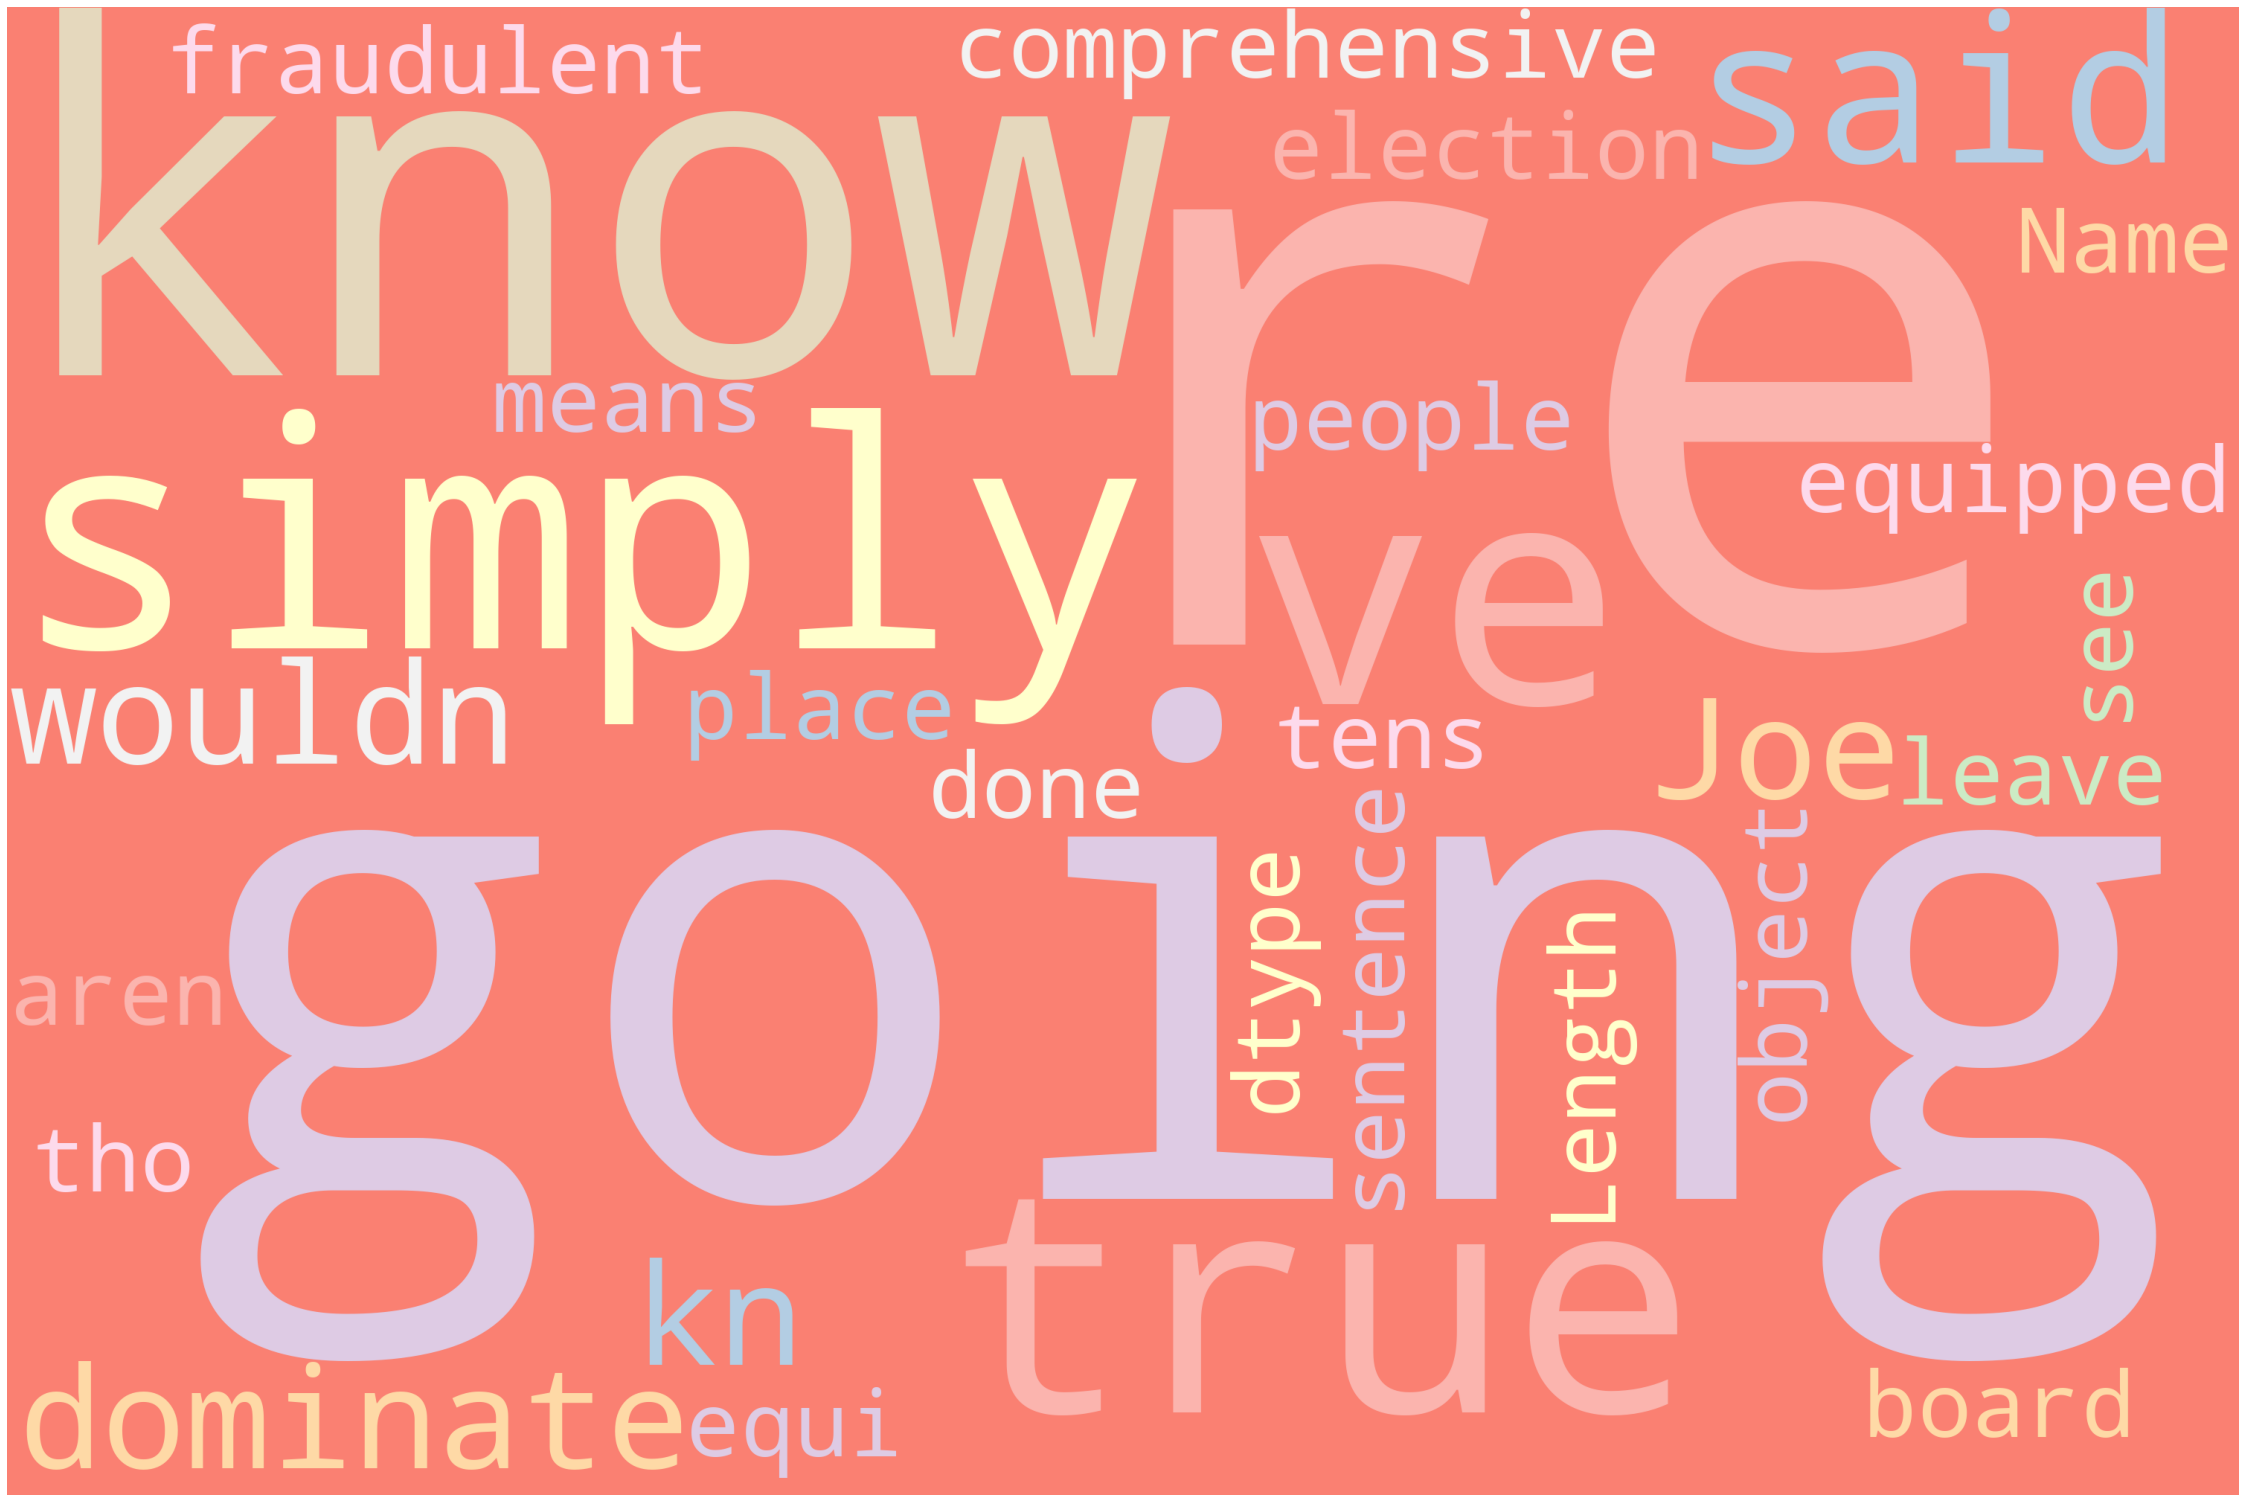

In [18]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color="salmon" , colormap="Pastel1" , collocations=False, stopwords=STOPWORDS).generate(str(negative_sent["sentence"]))
plot_cloud(wordcloud)

In [19]:
positive_sent = df[df.comp_score=="pos"] #positive sentences

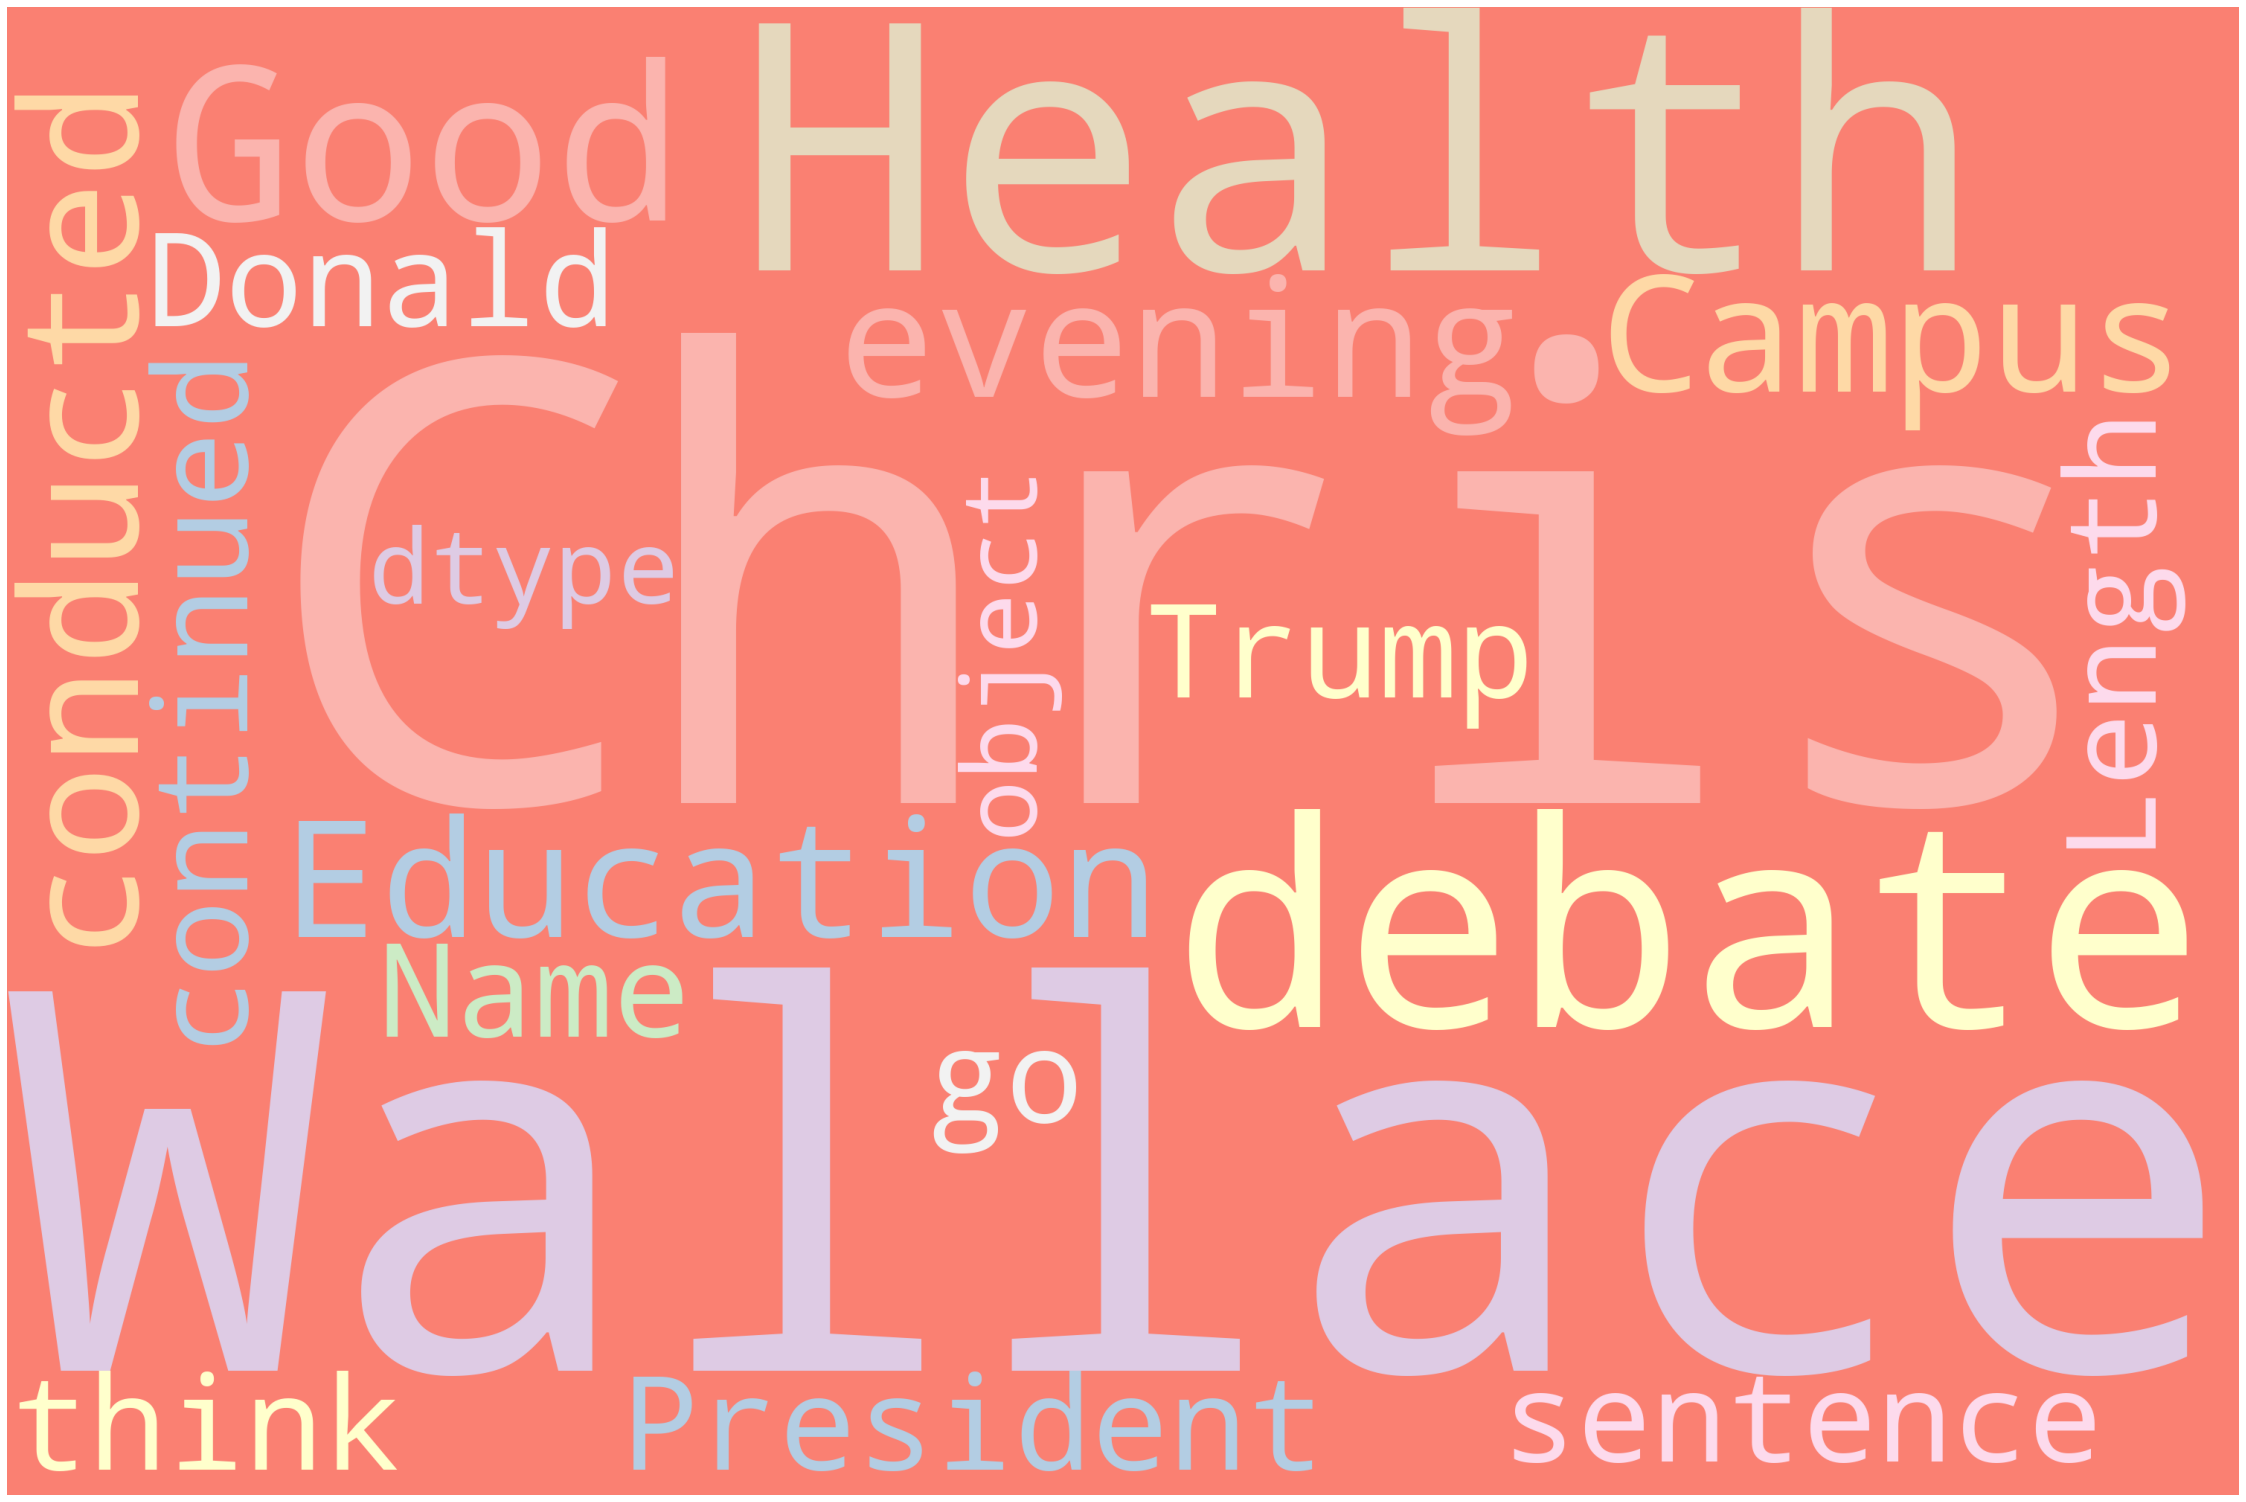

In [20]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color="salmon" , colormap="Pastel1" , collocations=False, stopwords=STOPWORDS).generate(str(positive_sent["sentence"]))
plot_cloud(wordcloud)

### Oganizations that were mentioned in the debate

In [21]:
ORGS =[]
for ent in doc.ents:
    if ent.label_ == "ORG":
        if ent.text not in ORGS:
            ORGS.append(ent.text)

In [22]:
ORGS

['Case Western Reserve University',
 'the Cleveland Clinic',
 'Fox News',
 'Commission on Presidential',
 'Commission',
 'Health Security',
 'the Supreme Court',
 'Senate',
 'Court',
 'the White House',
 'Supreme Court',
 'United States Senators',
 'Obamacare',
 'the Democratic Party',
 'COVID',
 'the Trump Administration',
 'Favored Nations',
 'Medicaid',
 'Medicare',
 'Congress',
 'Supreme Court Justices',
 'House',
 'Governors',
 'CDC',
 'Johnson & Johnson',
 'the Centers for Disease Control',
 'Pfizer',
 'can’t-',
 'The Federal Reserve',
 'Sir-\n\n',
 'the Board of Elections',
 'Obama',
 'Chrysler',
 'General Motors',
 'World',
 '00:23:35',
 'Ukraine-',
 'the Ku Klux Klan',
 'You-',
 'the National Guard',
 'FBI',
 'Space Force',
 'Court of Appeals',
 'I.',
 'Obama Environmental',
 'the Billion Tree Project',
 'Homeland Security',
 'the Commission on Presidential Debates',
 'the University of Utah']

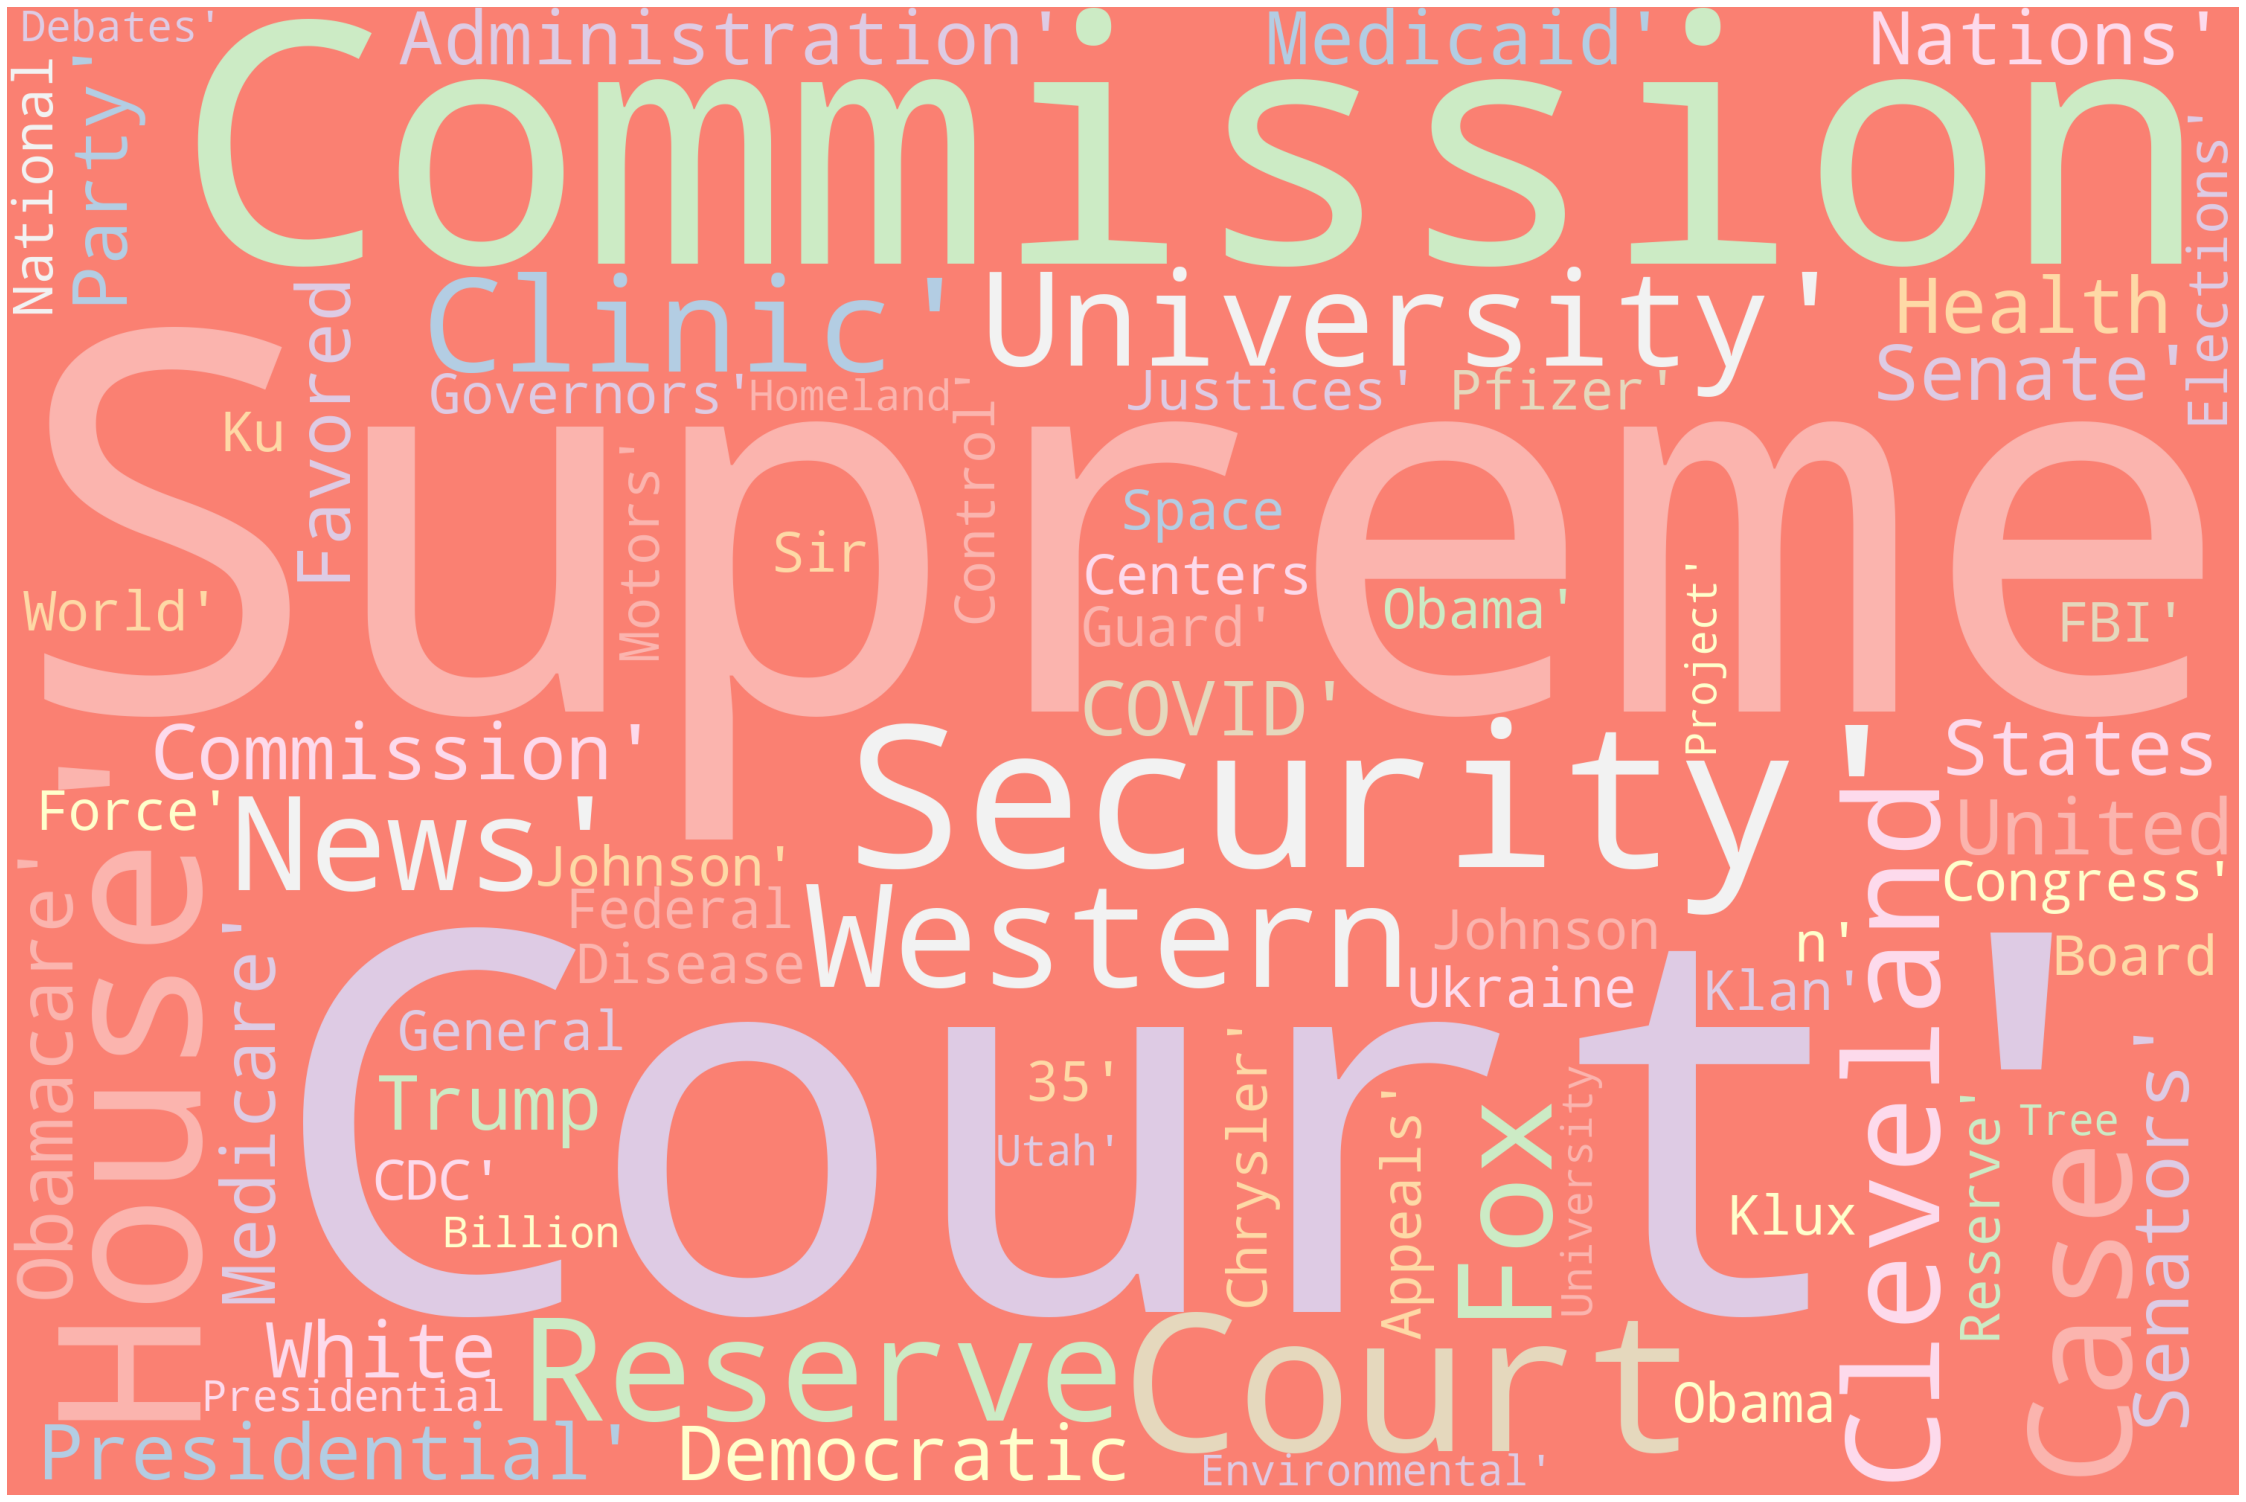

In [23]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color="salmon" , colormap="Pastel1" , collocations=False, stopwords=STOPWORDS).generate(str(ORGS))
plot_cloud(wordcloud)

### People mentioned in the debate

In [24]:
PERS =[]
for ent in doc.ents:
    if ent.label_ == "PERSON":
        if ent.text not in PERS:
            PERS.append(ent.text)

In [25]:
PERS

['Chris Wallace',
 'Donald J. Trump',
 'Joe Biden',
 'Trump',
 'Biden',
 'Amy Coney Barrett',
 'Ruth Bader Ginsburg',
 'Barrett',
 'Chris',
 'Merrick Garland',
 'Joe',
 'Ginsburg',
 'Harris',
 'Insulin',
 'Governors',
 'Bernie Sanders',
 'Pocahontas',
 'Xi',
 'Fauci',
 'Swine Flu',
 'Redfield',
 'Slaoui',
 'Moderna',
 'Slaoui-',
 'Nancy Pelosi',
 'Schumer',
 'Chuck',
 'Let’s-',
 'Inshallah',
 'Obama',
 'President-',
 'Please-',
 'Burisma',
 'Abraham Lincoln',
 'Floyd',
 'George Floyd',
 'Breonna Taylor',
 'Ferguson',
 'Law',
 'Kellyanne Conway',
 'Antifa',
 'Hillary Clinton',
 'Putin',
 'Patriot',
 'Hunter',
 'Beau Biden',
 'Beau',
 'Mitt Romney',
 'Green New Deal',
 'Flynn',
 'Trump-',
 'Biden-',
 'Carolyn Maloney',
 'Mike Pence',
 'Kamala Harris']

### What about Kamala Harris?

In [29]:
re.search("Kamala Harris",text)
text[126400:126530]

'lt Lake City. The two vice presidential nominees, Vice President Mike Pence and Senator Kamala Harris will debate at 9:00 PM Easte'

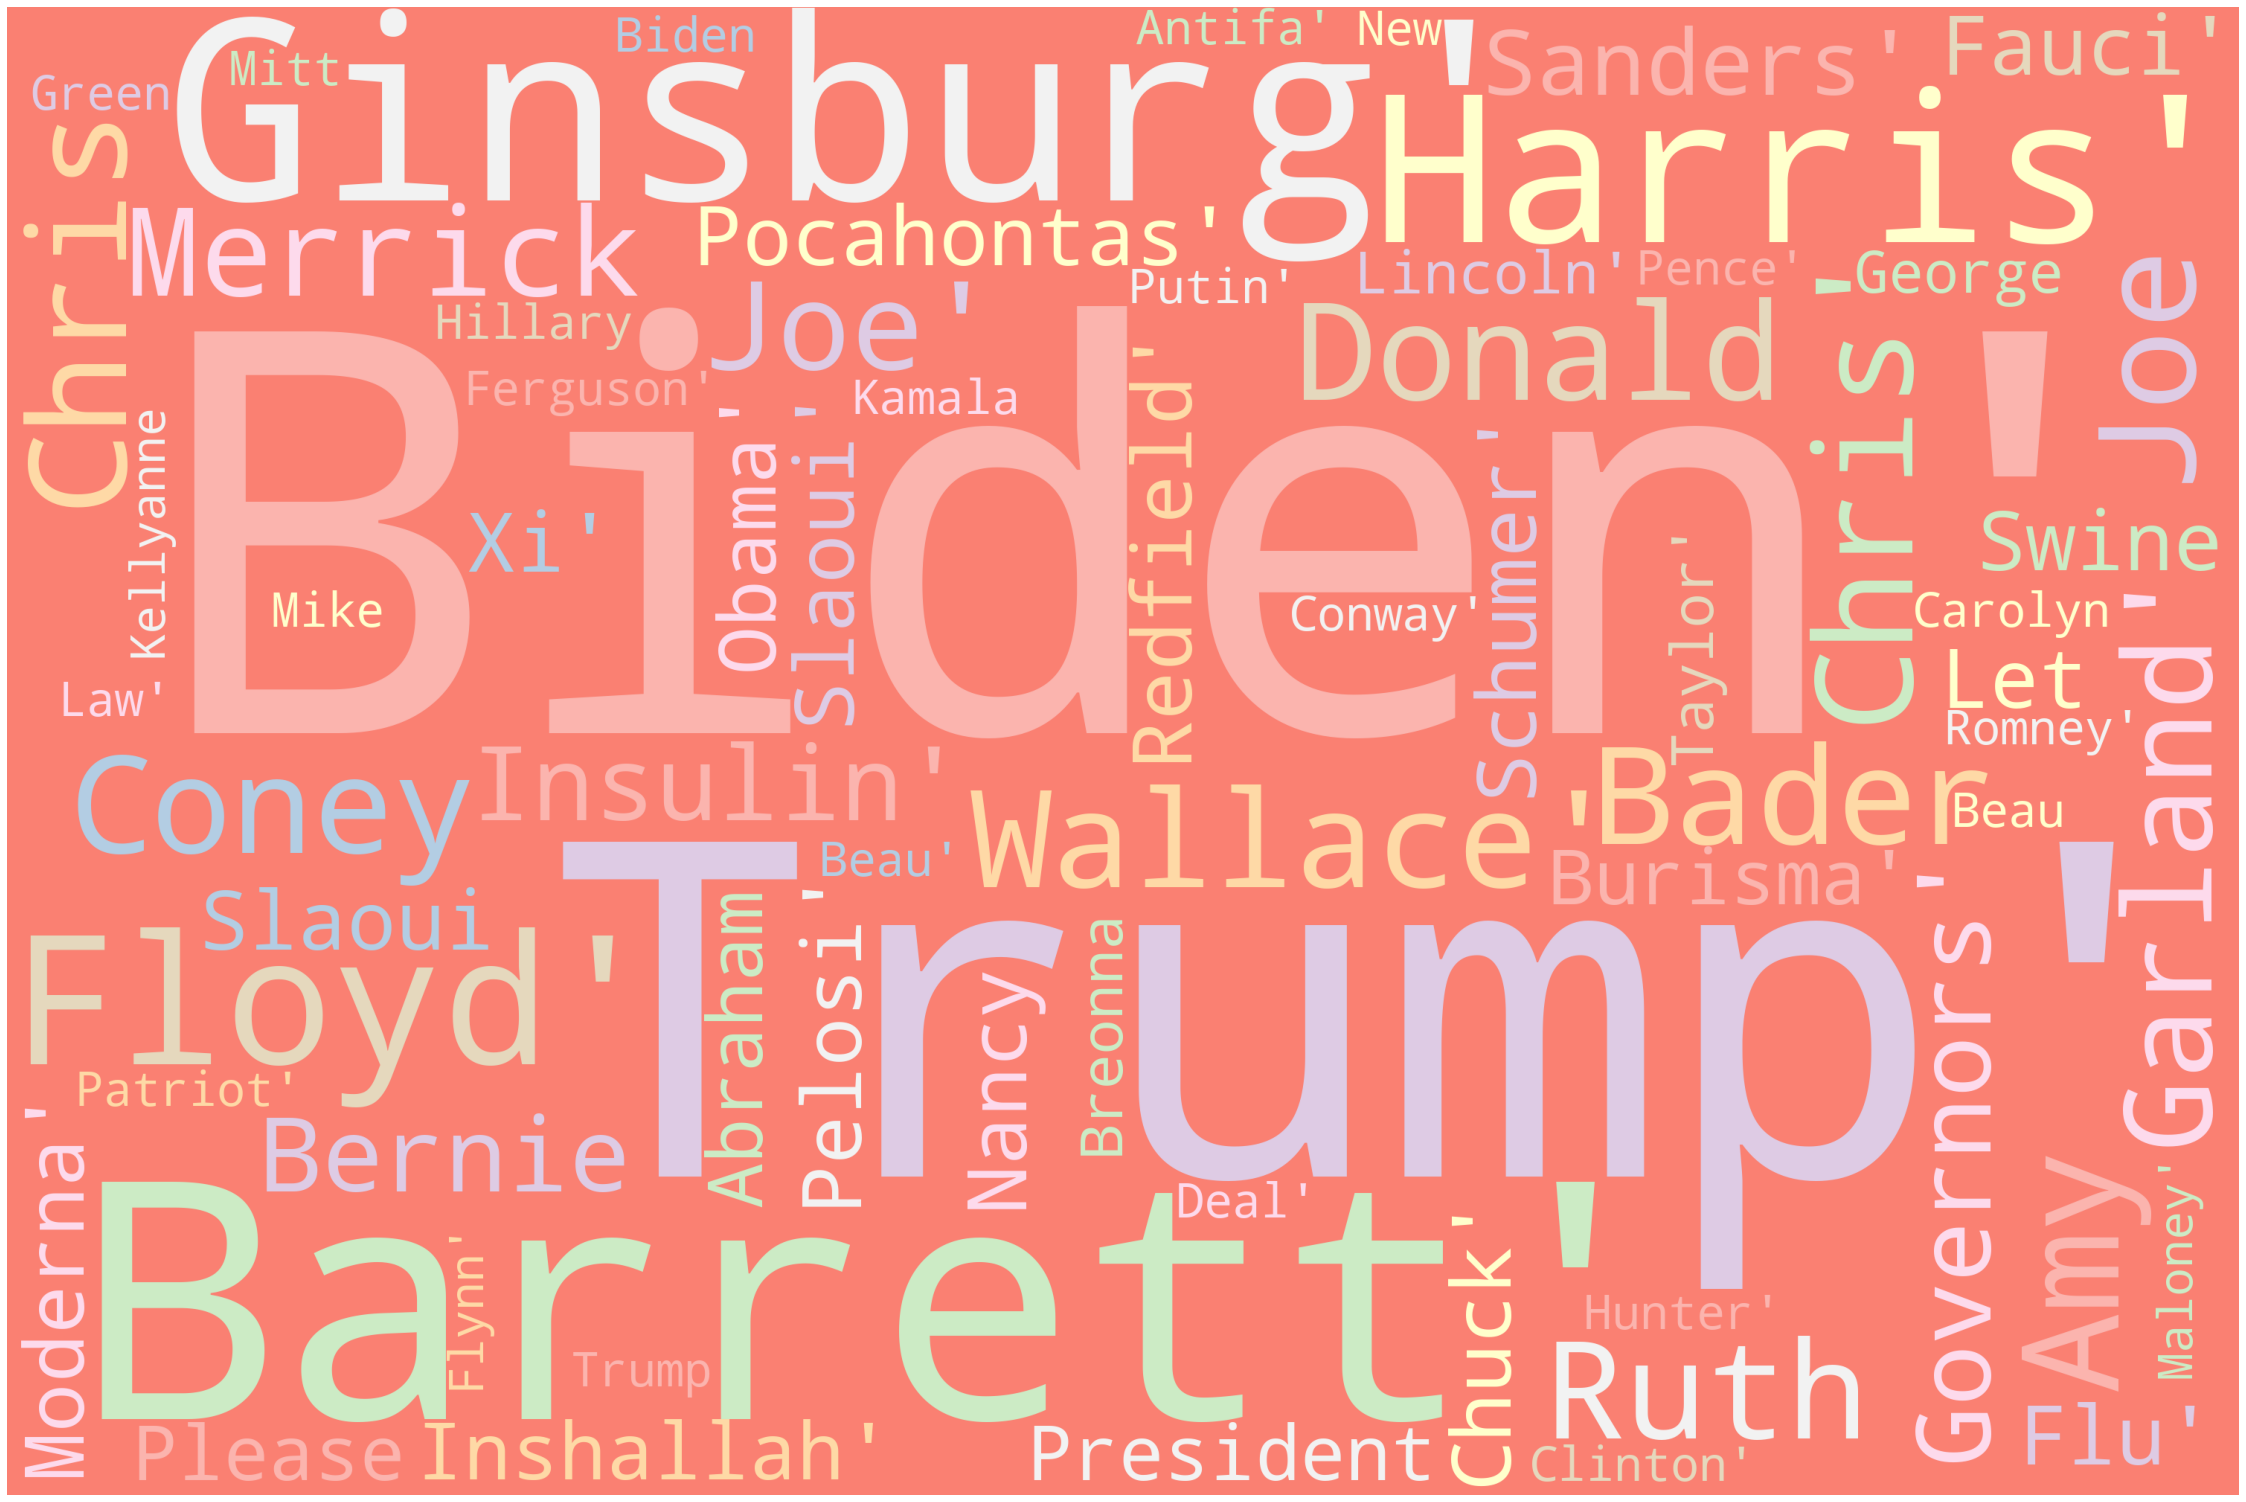

In [30]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color="salmon" , colormap="Pastel1" , collocations=False, stopwords=STOPWORDS).generate(str([PERS]))
plot_cloud(wordcloud)

### Places mentioned in the debate

In [31]:
GPES =[]
for ent in doc.ents:
    if ent.label_ == "GPE":
        if ent.text not in GPES:
            GPES.append(ent.text)

In [32]:
GPES

['United States',
 'China',
 'Obamacare',
 'States',
 'Bernie',
 'the United States',
 'Wuhan',
 'Russia',
 'India',
 'Pfizer',
 'Delaware State',
 'Delaware',
 'Pennsylvania',
 'North Carolina',
 'Michigan',
 'Scranton',
 'Claymont',
 'America',
 'the United States of America',
 'New York',
 'Ohio',
 'Obama',
 'Germany',
 'Japan',
 'Mexico',
 'Moscow',
 'Charlottesville',
 'Florida',
 'Texas',
 'Portland',
 'Chicago',
 'Seattle',
 'Minneapolis',
 'Oakland',
 'Baltimore',
 'Tulsa',
 'Fort Worth',
 'Fort worth',
 'Oregon',
 'US',
 'Antifa',
 'Kenosha',
 'VA',
 'Iraq',
 'Ukraine',
 'California',
 'Brazil',
 'Iowa',
 'Paris',
 'Manhattan',
 'New Jersey',
 'Virginia',
 'West Virginia',
 'Philadelphia',
 'Salt Lake City']

### Looks like India was also mentioned during the debate

In [33]:
import re
ind=re.search("India",text)
text[26350:26990]

'w how many people died in China. You don’t know how many people died in Russia. You don’t know how many people died in India. They don’t exactly give you a straight count, just so you understand. But if you look at what we’ve done, I closed it and you said, “He’s xenophobic. He’s a racist and he’s xenophobic,” because you didn’t think I should have closed our country. Wait a minute.\n\nChris Wallace: (22:06)\nSir, it’s his two minutes.\n\nPresident Donald J. Trump: (22:07)\nYou didn’t think we should have closed our country because you thought it was terrible. You wouldn’t have closed it for another two months. By my doing it early, in fa'

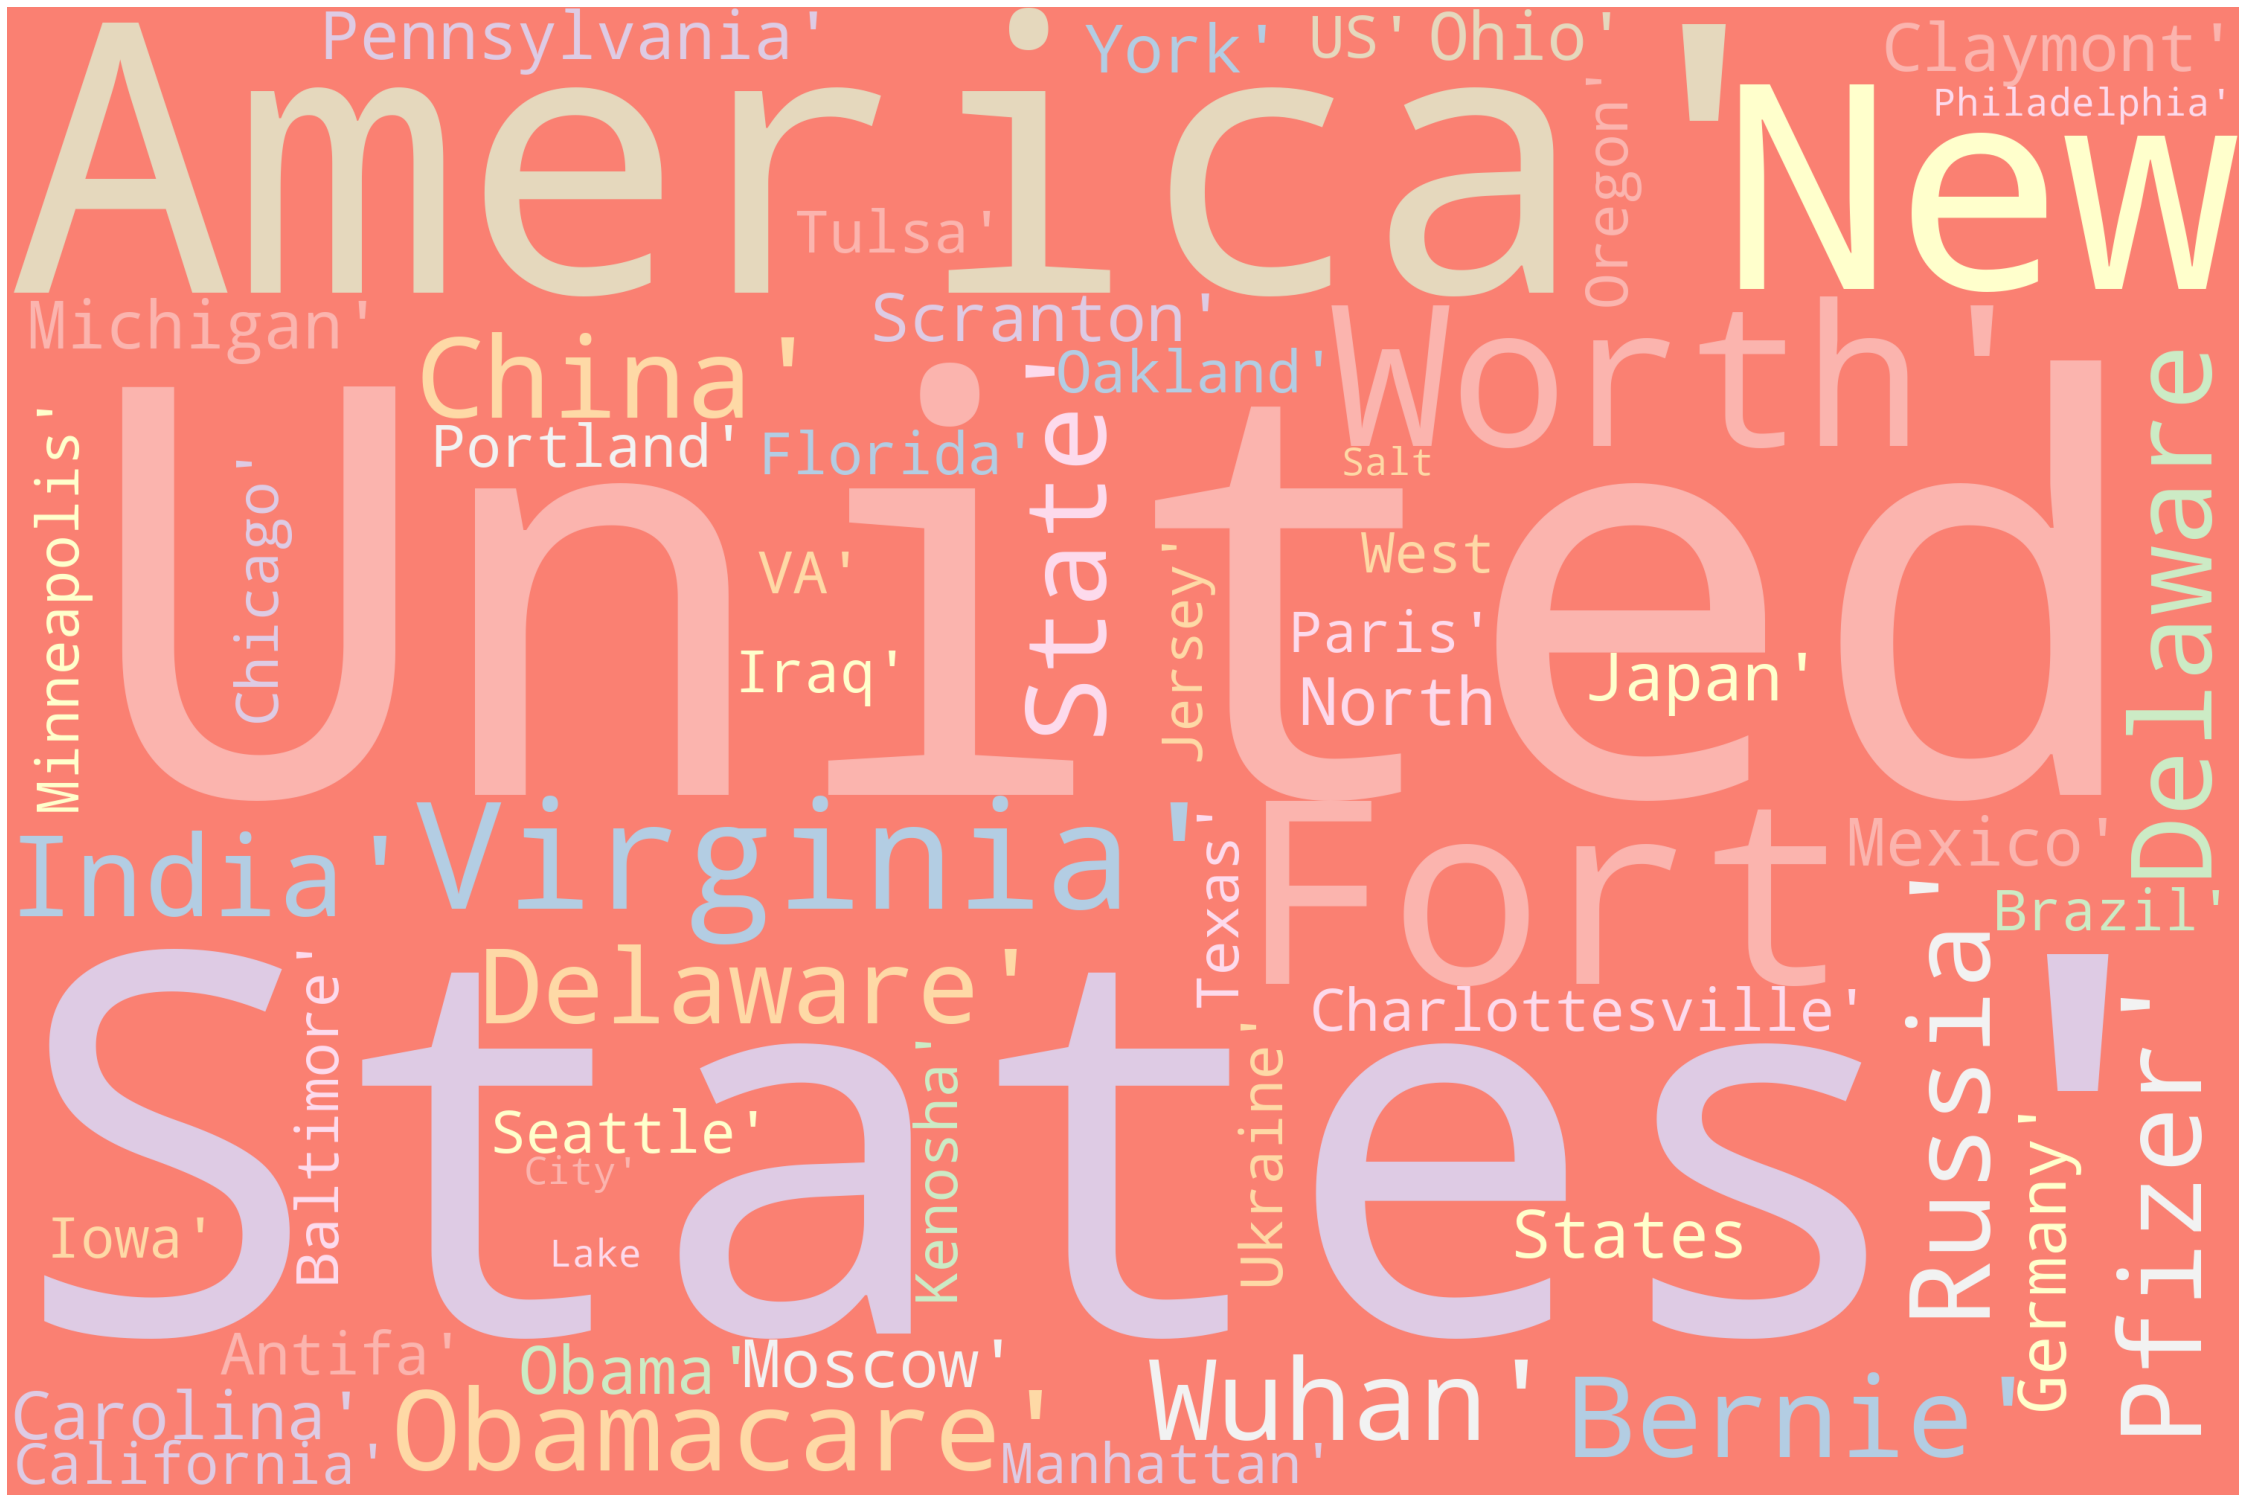

In [34]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color="salmon" , colormap="Pastel1" , collocations=False, stopwords=STOPWORDS).generate(str([GPES]))
plot_cloud(wordcloud)

### Any event mentioned in the debate?

In [35]:
EVENTS =[]
for ent in doc.ents:
    if ent.label_ == "EVENT":
        if ent.text not in EVENTS:
            EVENTS.append(ent.text)

In [36]:
EVENTS

['the Paris Accord', 'Biden', 'the Civil War']

### NER on the whole document using Spacy

In [38]:
for ent in doc.ents:
    print(ent.text+" "+ ent.label_ + spacy.explain(str(ent.label_)) )
    print("\n")
    print("\n")

Chris Wallace PERSONPeople, including fictional




Case Western Reserve University ORGCompanies, agencies, institutions, etc.




the Cleveland Clinic ORGCompanies, agencies, institutions, etc.




Chris Wallace PERSONPeople, including fictional




Fox News ORGCompanies, agencies, institutions, etc.




first ORDINAL"first", "second", etc.




2020 DATEAbsolute or relative dates or periods




Presidential Debates WORK_OF_ARTTitles of books, songs, etc.




Donald J. Trump PERSONPeople, including fictional




Joe Biden PERSONPeople, including fictional




Commission on Presidential ORGCompanies, agencies, institutions, etc.




Commission ORGCompanies, agencies, institutions, etc.




six CARDINALNumerals that do not fall under another type




roughly 15 minute TIMETimes smaller than a day




two minute TIMETimes smaller than a day




first ORDINAL"first", "second", etc.




Commission ORGCompanies, agencies, institutions, etc.




two CARDINALNumerals that do not fall under ano

Joe Biden PERSONPeople, including fictional




18:17 TIMETimes smaller than a day




Donald J. Trump PERSONPeople, including fictional




18:18 TIMETimes smaller than a day




Supreme Court Justices ORGCompanies, agencies, institutions, etc.




Joe Biden PERSONPeople, including fictional




Donald J. Trump PERSONPeople, including fictional




Joe PERSONPeople, including fictional




Chris Wallace PERSONPeople, including fictional




18:23 TIMETimes smaller than a day




Joe Biden PERSONPeople, including fictional




Donald J. Trump PERSONPeople, including fictional




Chris Wallace PERSONPeople, including fictional




18:27 TIMETimes smaller than a day




second ORDINAL"first", "second", etc.




Joe Biden PERSONPeople, including fictional




18:30 TIMETimes smaller than a day




Donald J. Trump PERSONPeople, including fictional




Joe PERSONPeople, including fictional




Joe Biden PERSONPeople, including fictional




Donald J. Trump PERSONPeople, including fictional




One CARDINALNumerals that do not fall under another type




last week DATEAbsolute or relative dates or periods




November 9th DATEAbsolute or relative dates or periods




November 9th DATEAbsolute or relative dates or periods




Donald J. Trump PERSONPeople, including fictional




North Carolina GPECountries, cities, states




Pennsylvania GPECountries, cities, states




Michigan GPECountries, cities, states




Chris Wallace PERSONPeople, including fictional




two minutes TIMETimes smaller than a day




Joe Biden PERSONPeople, including fictional




11:48 TIMETimes smaller than a day




COVID ORGCompanies, agencies, institutions, etc.




another $300 billion MONEYMonetary values, including unit




Scranton GPECountries, cities, states




Claymont GPECountries, cities, states




America GPECountries, cities, states




750 MONEYMonetary values, including unit




Donald J. Trump PERSONPeople, including fictional




12:17 TIMETimes smaller than a day




Chris Wall




22:28 TIMETimes smaller than a day




Joe Biden PERSONPeople, including fictional




Donald J. Trump PERSONPeople, including fictional




22:31 TIMETimes smaller than a day




183,000 MONEYMonetary values, including unit




Chris Wallace PERSONPeople, including fictional




22:31 TIMETimes smaller than a day




Joe Biden PERSONPeople, including fictional




22:37 TIMETimes smaller than a day




Donald J. Trump PERSONPeople, including fictional




22:38 TIMETimes smaller than a day




three and a half million CARDINALNumerals that do not fall under another type




Chris Wallace PERSONPeople, including fictional




22:39 TIMETimes smaller than a day




President- PERSONPeople, including fictional




Joe Biden PERSONPeople, including fictional




Chris Wallace PERSONPeople, including fictional




22:41 TIMETimes smaller than a day




Joe Biden PERSONPeople, including fictional




Donald J. Trump PERSONPeople, including fictional




22:45 TIMETimes smaller than a day


Joe Biden PERSONPeople, including fictional




35:12 TIMETimes smaller than a day




You- ORGCompanies, agencies, institutions, etc.




Donald J. Trump PERSONPeople, including fictional




35:14 TIMETimes smaller than a day




Chris Wallace PERSONPeople, including fictional




Joe Biden PERSONPeople, including fictional




Law PERSONPeople, including fictional




Donald J. Trump PERSONPeople, including fictional




35:23 TIMETimes smaller than a day




Joe Biden PERSONPeople, including fictional




35:24 TIMETimes smaller than a day




17% PERCENTPercentage, including "%"




15% PERCENTPercentage, including "%"




Donald J. Trump PERSONPeople, including fictional




35:31 TIMETimes smaller than a day




Chris Wallace PERSONPeople, including fictional




35:33 TIMETimes smaller than a day




Donald J. Trump PERSONPeople, including fictional




35:41 TIMETimes smaller than a day




Chris Wallace PERSONPeople, including fictional




35:44 TIMETimes smaller than a day

Donald J. Trump PERSONPeople, including fictional




50:13 TIMETimes smaller than a day




billion QUANTITYMeasurements, as of weight or distance




the Billion Tree Project ORGCompanies, agencies, institutions, etc.




Chris Wallace PERSONPeople, including fictional




Donald J. Trump PERSONPeople, including fictional




50:32 TIMETimes smaller than a day




California GPECountries, cities, states




California GPECountries, cities, states




Europe LOCNon-GPE locations, mountain ranges, bodies of water




California GPECountries, cities, states




every year DATEAbsolute or relative dates or periods




hundreds of thousands of acres CARDINALNumerals that do not fall under another type




Chris Wallace PERSONPeople, including fictional




the Obama Clean Power Plan LAWNamed documents made into laws.




Donald J. Trump PERSONPeople, including fictional




Joe Biden PERSONPeople, including fictional




Donald J. Trump PERSONPeople, including fictional




51:44 TIMETime



eight CARDINALNumerals that do not fall under another type




election day DATEAbsolute or relative dates or periods




election night TIMETimes smaller than a day




Donald J. Trump PERSONPeople, including fictional




01:07:50 TIMETimes smaller than a day




Chris Wallace PERSONPeople, including fictional




01:07:50 TIMETimes smaller than a day




First ORDINAL"first", "second", etc.




tonight TIMETimes smaller than a day




Trump PERSONPeople, including fictional




Donald J. Trump PERSONPeople, including fictional




today DATEAbsolute or relative dates or periods




Philadelphia GPECountries, cities, states




Philadelphia GPECountries, cities, states




Chris Wallace PERSONPeople, including fictional




Donald J. Trump PERSONPeople, including fictional




I am 100% PERCENTPercentage, including "%"




tens of thousands CARDINALNumerals that do not fall under another type




Chris Wallace PERSONPeople, including fictional




Donald J. Trump PERSONPeople, incl

# LinkedIn/Raman676